# --------------------------------LOGISTIC REGRESSION-------------------------------

## Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import csv
from ipykernel import kernelapp as app
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing, cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv(open('/Users/madhu/Desktop/ADS Project/Part-1/Combine_Clean_Data.csv','rU'), encoding='utf-8')
df.head()

,Unnamed: 0,id,loan_amnt,purpose,fico,dti,zip_code,State,emp_length,Year,Month,approval
0,0,1,5000.0,credit_card,737.0,27.65,860,AZ,10,2011,12,1
1,1,2,2500.0,car,742.0,1.00,309,GA,1,2011,12,1
2,2,3,2400.0,small_business,737.0,8.72,606,IL,10,2011,12,1
3,3,4,10000.0,other,692.0,20.00,917,CA,10,2011,12,1
4,4,5,3000.0,other,697.0,17.94,972,OR,1,2011,12,1


In [6]:
loan_df = pd.read_csv('/Users/madhu/Desktop/ADS Project/Part-1/Loan.csv', low_memory=False) 
decline_df= pd.read_csv(open('/Users/madhu/Desktop/ADS Project/Part-1/Decline.csv','rU'), encoding='utf-8')
loan_df=loan_df[['id','loan_amnt', 'purpose', 'fico', 'dti','zip_code', 'State', 'emp_length', 'Year', 'Month', 'approval']]
decline_df =decline_df[['id','loan_amnt','purpose', 'fico', 'dti','zip_code', 'State', 'emp_length', 'Year', 'Month','approval']]

In [7]:
loan_df.shape

(1640757, 11)

In [8]:
decline_df.shape

(6807820, 11)

In [9]:
d= decline_df[:1640753]
l = loan_df[:1640753]
l.shape

(1640753, 11)

In [10]:
com = pd.concat([d,l])
com.shape

(3281506, 11)

## Cross Validation for splitting the data in train and test sets

In [11]:
# columns to consider
cols = ['loan_amnt','emp_length','fico','dti','State','purpose']

In [12]:
X = com[cols]
y = com['approval']

In [13]:
#Flatten y into a 1-D array
y = np.ravel(y)

In [14]:
# Splitting the data
X_train, X_test, y_train, y_test =  cross_validation.train_test_split(X, y,test_size=0.30)

In [15]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Converting the categorical data to numeric 
X_train['pur'] = label_encoder.fit_transform(X_train['purpose'])
X_test['pur'] = label_encoder.fit_transform(X_test['purpose'])

X_train['state'] = label_encoder.fit_transform(X_train['State'])
X_test['state'] = label_encoder.fit_transform(X_test['State'])

In [16]:
X_train = X_train._get_numeric_data()
X_test = X_test._get_numeric_data()

In [17]:
X_train.head()

,loan_amnt,emp_length,fico,dti,pur,state
1463414,31350.0,10,667.0,28.25,39049,42
804636,6000.0,2,676.0,32.32,46231,6
1075501,4850.0,4,682.0,8.05,39049,43
1291129,14950.0,10,672.0,10.52,39756,31
1165008,1000.0,0,558.0,2.71,37403,43


### Creating the model

In [18]:
model = LogisticRegression()
model = model.fit(X_train, y_train)

In [19]:
# Accuracy of the model created
accuracy = model.score(X_train, y_train)
print(accuracy)

0.824624061951


In [20]:
# Run the model on the test set
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [21]:
#Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[451156  41259]
 [202211 289826]]


In [22]:
# Predict the values for test and train using the model
y_test_predicted = model.predict(X_test)
y_train_predicted= model.predict(X_train)

In [23]:
#Compute FPR and TPR
from sklearn.metrics import roc_curve
preds = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)

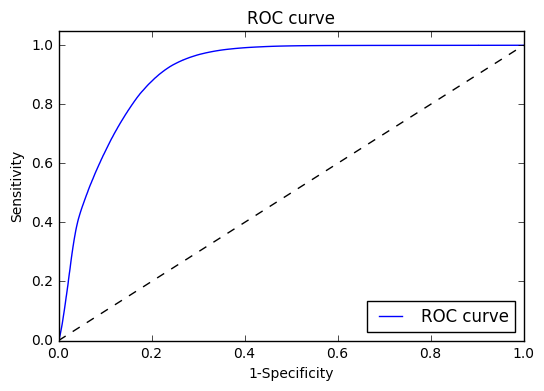

In [64]:
#Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [24]:
# Caluclate the rms and mae values
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)
print('RMS_test:',rms_test)

MAE_train: 0.175375938049
MAE_test: 0.247315257626
RMS_train: 0.175375938049
RMS_test: 0.247315257626


The text in the document by SHREYANTH REDDY BEZAWADA is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/

Copyright 2018 SHREYANTH REDDY BEZAWADA AND ADITYA MOHAN KUMAR

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.